# Trabajo Integrador Parte 4

Nombre:Tatiana Arenas Suarez

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/heart_disease/"

In [3]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Haré borrado  ya que hay dos columnas con valores no validos o ?.

In [6]:
print(my_data['thal'].value_counts())
print(my_data['ca'].value_counts())

thal
3.0    166
7.0    117
6.0     17
?        2
Name: count, dtype: int64
ca
0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64


In [7]:
my_data = my_data[my_data['thal'] != '?']
my_data = my_data[my_data['ca'] != '?']

Hay que tener en cuenta que la data categoriaca es nominal.

In [8]:
# se separan las variables.Se hace un casteo de aquellas que sabemos son categoricas. Esto para que el hotencoding funcione 
# ya que son categoricas nominales y no poseen un orden asignado por el numero que sustentan.


numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach" ]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"
my_data[categorical_features] = my_data[categorical_features].astype("string")
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    string 
 2   cp        296 non-null    string 
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    string 
 6   restecg   296 non-null    string 
 7   thalach   296 non-null    float64
 8   exang     296 non-null    string 
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    string 
 11  ca        296 non-null    string 
 12  thal      296 non-null    string 
 13  num       296 non-null    int64  
dtypes: float64(5), int64(1), string(8)
memory usage: 34.7 KB


Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [9]:
my_data[target].value_counts()
y = my_data[target].values
sano_mask = y == 0
enfermo_mask = y > 0
y_class = y.copy()
y_class[sano_mask] = 0
y_class[enfermo_mask] = 1
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [10]:
# se hace el hot encoding 
hot_data = pd.get_dummies(my_data[categorical_features], drop_first=True,dtype=float)
hot_data

,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
299,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Estandarizamos el train solo las variables numericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(my_data[numerical_features]) 

In [12]:
X_data = np.concatenate([hot_data.to_numpy(),X_scaled], axis = 1)
X_data.shape

(296, 21)

In [13]:
# se separan los datos en train y test para sacar metricas del mismo.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_class, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 21) (207,)
Test set: (89, 21) (89,)


In [14]:
new_categorical = ['sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0',
       'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']

En este caso se hara reducción de dimensionalidad del data set: 

In [15]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
X_transformed = pca.transform(X_scaled)
X_transformed.shape[1]


4

<Axes: >

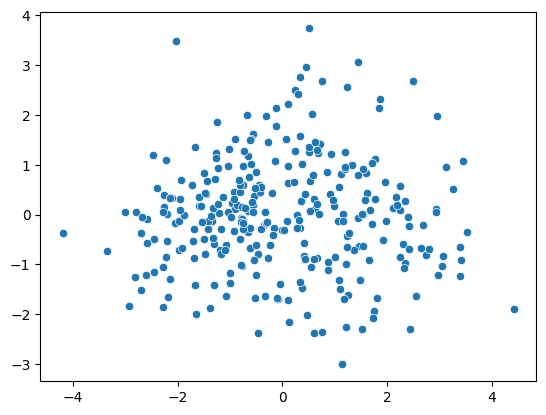

In [16]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

Dado que la reducción de variables solo se da por 2 ( es decir de 6 a 4) y la cantidad de datos no es muy grande, no vale la pena hacer la regresión logistica con PCA. Lo haré completa. 

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [17]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix

# LogisticRegression

Para la regresión logística usare el modelo ya dado por sklearn.  Primero, importe el módulo Logistic Regression y cree un objeto clasificador Logistic Regression utilizando la función LogisticRegression() con random_state para la reproducibilidad. Luego, ajuste su modelo en el conjunto de trenes usando fit() y realice la predicción en el conjunto de prueba usando predict().

In [18]:
# se entrena el modelo 
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [19]:
# se predice sobre los valores de prueba
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1])

In [20]:
# la regresión logistica da como resultado una probabilidad p de pertenecer a una clase 
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.430457  , 0.569543  ],
       [0.56220139, 0.43779861],
       [0.70840361, 0.29159639],
       [0.36114779, 0.63885221],
       [0.32774864, 0.67225136],
       [0.47532954, 0.52467046],
       [0.52478786, 0.47521214],
       [0.31260008, 0.68739992],
       [0.60013124, 0.39986876],
       [0.65947467, 0.34052533],
       [0.54483432, 0.45516568],
       [0.49327014, 0.50672986],
       [0.57118113, 0.42881887],
       [0.7761969 , 0.2238031 ],
       [0.40743966, 0.59256034],
       [0.28416439, 0.71583561],
       [0.51757557, 0.48242443],
       [0.6479405 , 0.3520595 ],
       [0.50561234, 0.49438766],
       [0.67661915, 0.32338085],
       [0.65079011, 0.34920989],
       [0.20629336, 0.79370664],
       [0.21870384, 0.78129616],
       [0.51600842, 0.48399158],
       [0.52416566, 0.47583434],
       [0.37255751, 0.62744249],
       [0.60275604, 0.39724396],
       [0.71433148, 0.28566852],
       [0.44547634, 0.55452366],
       [0.39305741, 0.60694259],
       [0.

La regresión logística se convierte fácilmente en un **clasificador** eligiendo un **límite de decisión**. Es decir, elegir un valor de corte  $c=\log\left(\frac{p}{1-p}\right)$

In [70]:
# para obtener la matriz de confución usamos el modulo sklearn metrics

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[31  9]
 [10 39]]


Confusion matrix, without normalization
[[31  9]
 [10 39]]


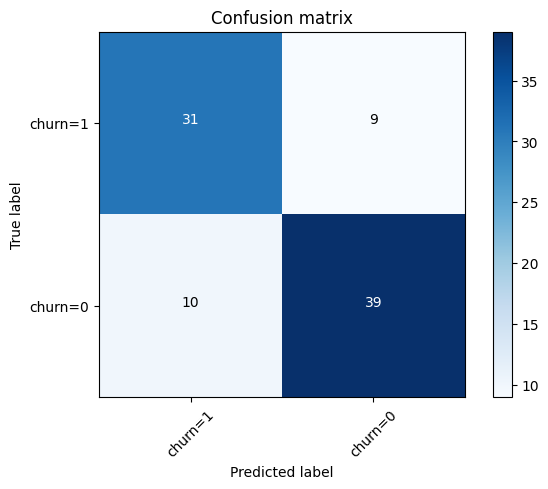

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

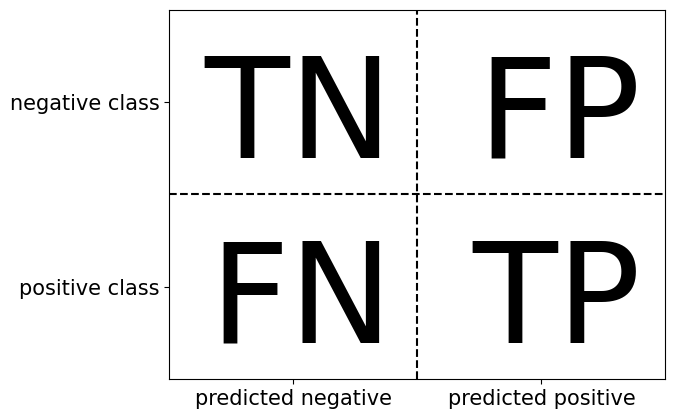

In [69]:
# recordemos cada uno de los elementos de la matriz de confusión
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

Metricas del modelo son : 

In [23]:

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        49
           1       0.76      0.78      0.77        40

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.79      0.79      0.79        89



In [24]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5487468762191723

# LogisticRegressionCV

In [25]:
LR_cv = LogisticRegressionCV(cv=5, random_state=42)
LR_cv.fit(X_train,y_train)
LR_cv

LogisticRegressionCV(cv=5, random_state=42)

In [26]:
yhat_cv = LR_cv.predict(X_test)
yhat_cv

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1])

In [27]:
yhat_prob_cv = LR_cv.predict_proba(X_test)
yhat_prob_cv

array([[0.78, 0.22],
       [0.15, 0.85],
       [0.97, 0.03],
       [0.19, 0.81],
       [0.06, 0.94],
       [0.42, 0.58],
       [0.94, 0.06],
       [0.05, 0.95],
       [0.79, 0.21],
       [0.99, 0.01],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.39, 0.61],
       [0.03, 0.97],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.86, 0.14],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.07, 0.93],
       [0.13, 0.87],
       [0.66, 0.34],
       [0.18, 0.82],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.39, 0.61],
       [0.16, 0.84],
       [0.57, 0.43],
       [0.96, 0.04],
       [0.87, 0.13],
       [0.99, 0.01],
       [0.54, 0.46],
       [0.6 , 0.4 ],
       [0.89, 0.11],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.54, 0.46],
       [0.26, 0.74],
       [0.07, 0.93],
       [0.23, 0.77],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.78,

In [28]:
print(confusion_matrix(y_test, yhat_cv, labels=[1,0]))

[[34  6]
 [ 5 44]]


Confusion matrix, without normalization
[[34  6]
 [ 5 44]]


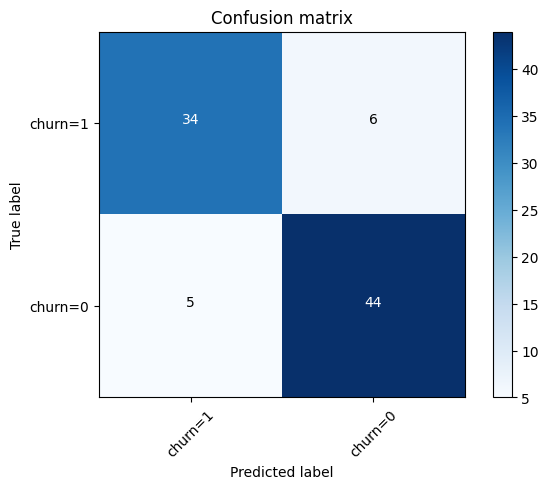

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_cv, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [64]:
print(classification_report(y_test, yhat_cv))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.87      0.85      0.86        40

    accuracy                           0.88        89
   macro avg       0.88      0.87      0.87        89
weighted avg       0.88      0.88      0.88        89



In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob_cv)

0.35082189549230486

# Comparación de modelos 

Es mejor viendo clasificando los casos positivos el LogisticRegressionCV en la matriz de confución podemos ver que la diagonal tiene mayor peso y en general su accuracy es 0.88 por encima del 0.77 del LogisticRegression sin cross validation. En genral , también las metricas de  precision  recall  f1-score son mayores en LogisticRegressionCV.

# Modelo aplicado con Statsmodels

In [32]:
import statsmodels.api as sm

In [51]:
y_train_st = pd.DataFrame(y_train, columns=['num'])
X_train_st = pd.DataFrame(X_train, columns=['sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0',
       'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0',"age", "trestbps", "chol", "thalach", "oldpeak", "thalach" ])
X_train_st["Intercept"] = 1
X_test_st = pd.DataFrame(X_test, columns=['sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0',
       'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0',"age", "trestbps", "chol", "thalach", "oldpeak", "thalach" ])
X_test_st["Intercept"] = 1
y_test_st = pd.DataFrame(y_test, columns=['num'])

In [43]:
# Se crea y ajusta el modelo
model = sm.Logit(y_train_st, X_train_st)
model_res = model.fit(disp=False) 

In [44]:
model_res.params

sex_1.0        1.475663
cp_2.0         1.282488
cp_3.0        -0.195567
cp_4.0         2.232354
fbs_1.0       -0.662131
restecg_1.0    0.312313
restecg_2.0    0.448803
exang_1.0      0.716638
slope_2.0      1.204884
slope_3.0     -0.593633
ca_1.0         2.217196
ca_2.0         2.810890
ca_3.0         2.248391
thal_6.0       0.553991
thal_7.0       1.069808
age           -0.150147
trestbps       0.629445
chol           0.334855
thalach       -0.166659
oldpeak        0.737076
thalach       -0.166660
Intercept     -4.588037
dtype: float64

In [41]:
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    num   No. Observations:                  207
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                           19
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.4675
Time:                        20:31:31   Log-Likelihood:                -76.181
converged:                       True   LL-Null:                       -143.07
Covariance Type:            nonrobust   LLR p-value:                 2.794e-19
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sex_1.0         0.2349      0.491      0.478      0.633      -0.728       1.198
cp_2.0         -1.5098      0.634     -2.380      0.017      -2.753      -0.266
cp_3.0         -2.7050      0.651     -4.157      0.000      -3.980      -1.430
cp_4.0         -0.4167      0.553     -0.753      0.451      -1.501       0.668
fbs_1.0        -0.5115      0.675     -0.758      0.448      -1.834       0.811
restecg_1.0    -0.5619      3.245     -0.173      0.863      -6.922       5.798
restecg_2.0    -0.1324      0.451     -0.293      0.769      -1.017       0.752
exang_1.0       0.6454      0.523      1.233      0.218      -0.380       1.671
slope_2.0       0.2120      0.502      0.423      0.673      -0.771       1.195
slope_3.0      -1.9208      1.230     -1.562      0.118      -4.331       0.489
ca_1.0          1.7913      0.538      3.330      0.001       0.737       2.846
ca_2.0          1.2488      0.794      1.573      0.116      -0.307       2.804
ca_3.0          1.9973      1.131      1.766      0.077      -0.219       4.214
thal_6.0        0.9220      1.122      0.822      0.411      -1.278       3.122
thal_7.0        0.9183      0.513      1.790      0.073      -0.087       1.924
age            -0.1571      0.245     -0.642      0.521      -0.637       0.322
trestbps        0.3921      0.221      1.772      0.076      -0.041       0.826
chol            0.3499      0.227      1.543      0.123      -0.094       0.794
thalach        -0.2242   8.34e+06  -2.69e-08      1.000   -1.64e+07    1.64e+07
oldpeak         0.9773      0.371      2.632      0.008       0.250       1.705
thalach        -0.2242   8.34e+06  -2.69e-08      1.000   -1.64e+07    1.64e+07
===============================================================================
"""

In [49]:
# .assgn asigna una columna a un data frame 

prediction_data = X_test_st.assign(probability=model_res.predict(X_test_st))
prediction_data 

,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,...,thal_6.0,thal_7.0,age,trestbps,chol,thalach,oldpeak,thalach,Intercept,probability
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.385830,-0.092903,-0.969375,-0.810668,-0.387802,-0.810668,1,0.166945
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.385830,-0.374658,1.011742,0.932894,-0.903324,0.932894,1,0.925376
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.163472,0.470607,-0.238477,1.325195,-0.903324,1.325195,1,0.027236
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.492474,2.724649,0.511654,0.017524,0.471400,0.017524,1,0.813655
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,-1.384801,0.245203,1.300254,-1.072202,0.643241,-1.072202,1,0.961752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.492474,0.696011,-1.046312,-0.374777,2.017965,-0.374777,1,0.993435
85,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.496494,2.161138,0.780932,0.409825,-0.731483,0.409825,1,0.618369
86,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.271145,1.597628,-0.373116,-0.505544,1.072842,-0.505544,1,0.854690
87,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.496494,2.161138,1.511830,-0.418366,2.017965,-0.418366,1,0.984939


In [50]:
prediction_data['most_likely_outcome'] = np.round(prediction_data['probability'])
prediction_data

,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,...,thal_7.0,age,trestbps,chol,thalach,oldpeak,thalach,Intercept,probability,most_likely_outcome
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.385830,-0.092903,-0.969375,-0.810668,-0.387802,-0.810668,1,0.166945,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.385830,-0.374658,1.011742,0.932894,-0.903324,0.932894,1,0.925376,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.163472,0.470607,-0.238477,1.325195,-0.903324,1.325195,1,0.027236,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.492474,2.724649,0.511654,0.017524,0.471400,0.017524,1,0.813655,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,-1.384801,0.245203,1.300254,-1.072202,0.643241,-1.072202,1,0.961752,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.492474,0.696011,-1.046312,-0.374777,2.017965,-0.374777,1,0.993435,1.0
85,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.496494,2.161138,0.780932,0.409825,-0.731483,0.409825,1,0.618369,1.0
86,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.271145,1.597628,-0.373116,-0.505544,1.072842,-0.505544,1,0.854690,1.0
87,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.496494,2.161138,1.511830,-0.418366,2.017965,-0.418366,1,0.984939,1.0


In [59]:
actual_response = y_test_st.astype(int).to_numpy().flatten()
predicted_response = prediction_data['most_likely_outcome'].astype(int).to_numpy().flatten()
outcomes = pd.DataFrame({'actual_response':actual_response, 'predicted_response':predicted_response})
print(outcomes.value_counts())

actual_response  predicted_response
0                0                     43
1                1                     34
0                1                      6
1                0                      6
Name: count, dtype: int64


In [60]:
conf_matrix = model_res.pred_table()
conf_matrix

array([[99., 11.],
       [14., 83.]])

In [63]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
acc = (TN + TP) / (TN + TP + FN + FP)
spec = TN / (TN + FP)
print(acc)
print(spec)

0.8792270531400966
0.9


# Comparación de modelos 

Es mejor viendo clasificando los casos positivos el LogisticRegressionCV en la matriz de confución podemos ver que la diagonal tiene mayor peso y en general su accuracy es 0.88 por encima del 0.87 del LogisticRegression sin cross validation creado con stats models. La ventaja de usar stats models es que da un resumen general de cada una de las entradas del modelo, podemos ver que son pocas las que cumplen que el p value sea cercano al nivel de tolerancia de 0.05.
